In [1]:
# Descriptive Statistics
# Source : http://www.learndatasci.com/data-science-statistics-using-python/

import pandas as pd

df = pd.read_csv('datasets/statistics/middle_tn_schools.csv')
df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [2]:
df.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [8]:
df[['reduced_lunch', 'school_rating']]\
    .groupby(['school_rating'])\
    .describe()\
    .unstack() # transpose the data to make more readable

                      school_rating
reduced_lunch  count  0.0              43.000000
                      1.0              40.000000
                      2.0              44.000000
                      3.0              56.000000
                      4.0              86.000000
                      5.0              78.000000
               mean   0.0              83.581395
                      1.0              74.950000
                      2.0              64.272727
                      3.0              50.285714
                      4.0              41.000000
                      5.0              21.602564
               std    0.0               8.813498
                      1.0              11.644191
                      2.0              11.956051
                      3.0              13.550866
                      4.0              16.681092
                      5.0              17.651268
               min    0.0              53.000000
                      1.0        

In [9]:
df[['reduced_lunch', 'school_rating']].corr()

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


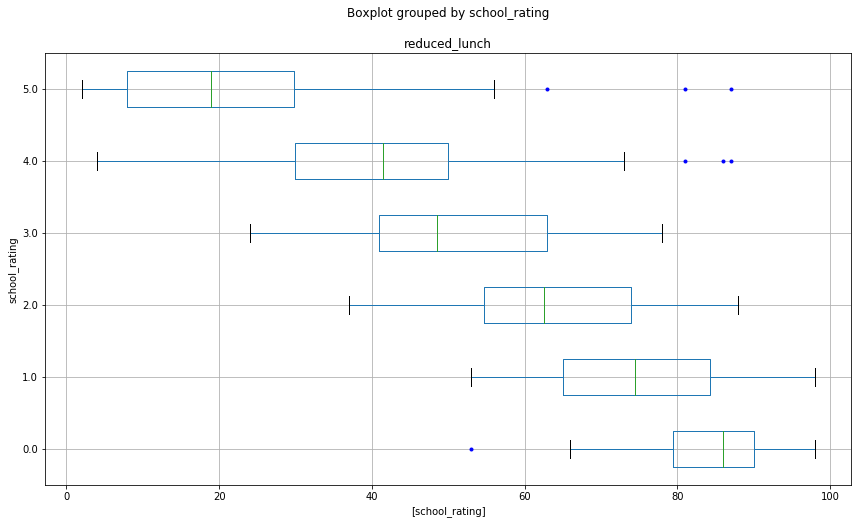

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.set_ylabel('school_rating')

_ = df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8), vert=False, sym='b.', ax=ax)

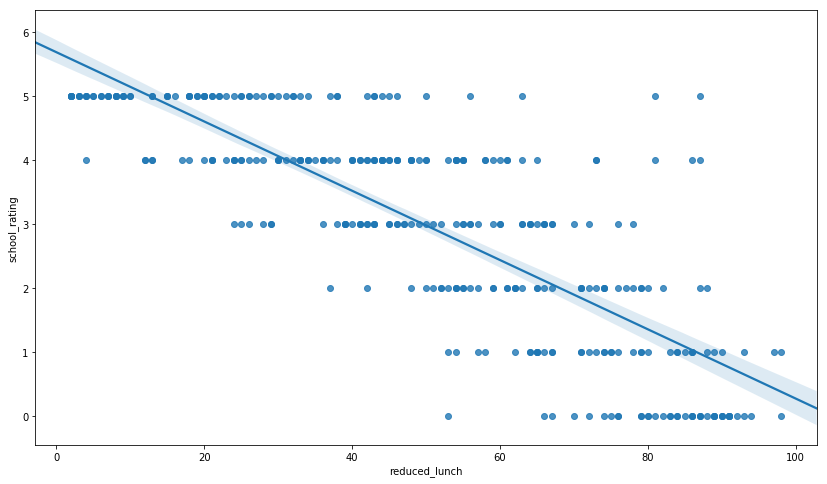

In [12]:
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')

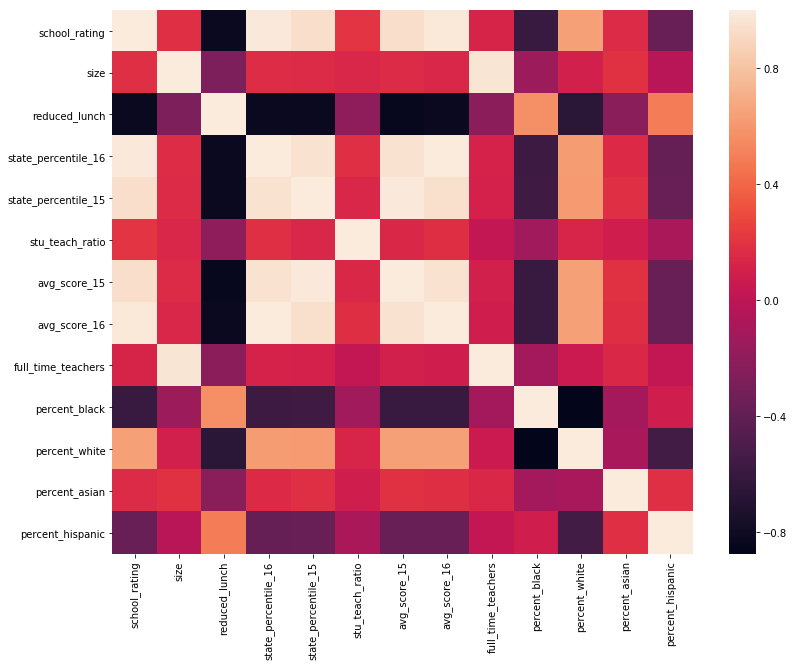

In [13]:
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10))

_ = sns.heatmap(corr, ax=ax,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)